In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sx=MinMaxScaler()
sy=MinMaxScaler()
scaled_X=sx.fit_transform(df.drop('price',axis=1))
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [6]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
df.shape

(20, 3)

In [9]:
def batch_grad(X,y_true,epochs,learning_rate=0.01):
    num_feat=X.shape[1]
    w=np.ones(shape=(num_feat))
    b=0
    total_samples=X.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred=np.dot(w,X.T)+b
        
        cost = np.mean(np.square(y_true-y_pred))
        
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad=-(2/total_samples)*np.sum(y_true-y_pred)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_grad(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w, b, cost
        
        
        

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

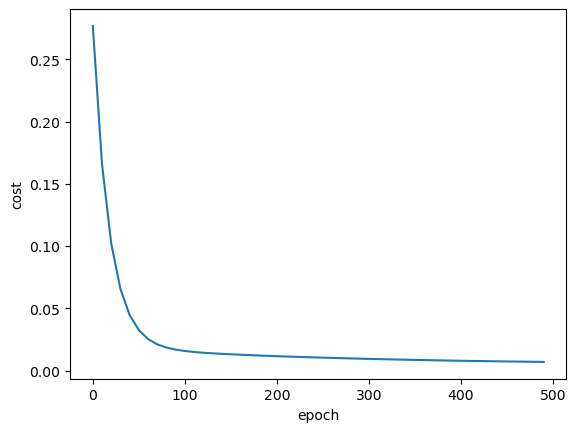

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [11]:
def predict_area(area,bed,w,b):
    scaled_X=sx.transform([[area,bed]])[0]
    scaled_price=scaled_X[0]*w[0]+scaled_X[1]*w[1]+b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict_area(1056,2,w,b)
    
    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


32.0964952553193

In [12]:
predict_area(1000,2,w,b)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [13]:
import random
random.randint(0,4)

0

In [14]:
# stocastic gradient


def SGD(X,y_true,epochs,learning_rate=0.01):
    num_feat=X.shape[1]
    w=np.ones(shape=(num_feat))
    b=0
    total_samples=X.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_pred=np.dot(w,sample_x.T)+b
        
        cost = np.square(sample_y-y_pred)
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples)*(sample_y-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd
        

(array([0.70779198, 0.67609961]), -0.22874603640241203, 0.010114933615216757)

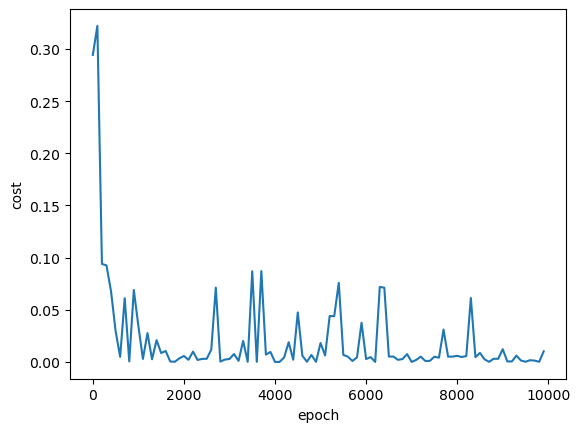

In [15]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [53]:
def mini_batch(X,y_true,epochs,learning_rate=0.01):
    num_feat=X.shape[1]
    w=np.ones(shape=(num_feat))
    b=0
    total_samples=X.shape[0]
    cost_list = []
    epoch_list = []
    batch_size=4
    n_sam=total_samples//batch_size
    
    for i in range(epochs):
        indices=np.random.choice(X.shape[0],n_sam,replace=False)
        samples_X=X[indices]
        samples_y=y_true[indices]
        y_pred=np.dot(w,samples_X.T)+b
        cost=np.mean(np.square(samples_y-y_pred))
            
        w_grad = -(2/total_samples)*(samples_X.T.dot(samples_y-y_pred))
        b_grad = -(2/total_samples)*np.sum((samples_y-y_pred))
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_batch(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),1000)
w_mini, b_mini, cost_mini
        
        
        
            
            
    

(array([0.76279487, 0.72911057]), -0.2800350474571724, 0.01576638266560009)

In [35]:
n_samples=5
indices = np.random.choice(scaled_X.shape[0], n_samples, replace=False)
indices

array([17, 16,  8, 13,  1])

In [36]:
w_sgd,b_sgd,cost_sgd

(array([0.70779198, 0.67609961]), -0.22874603640241203, 0.010114933615216757)

In [37]:
predict_area(2600,4,w_mini,b_mini)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


171.64195831353294

In [38]:
predict_area(2600,4,w_sgd,b_sgd)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.88245789650526

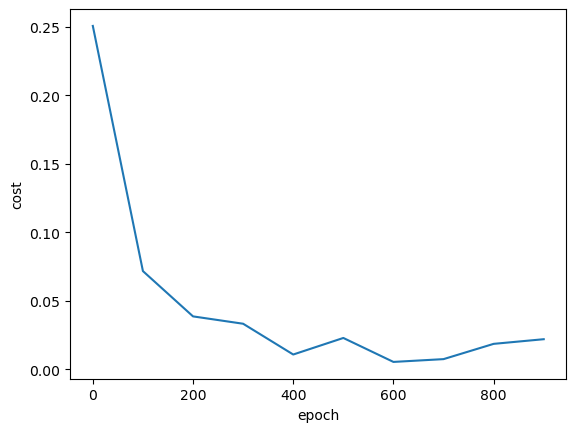

In [54]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mini,cost_list_mini)

In [50]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_Y.reshape(scaled_Y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.7102111 , 0.67826356]), -0.23343672584467398, 0.013987432723143475)

In [51]:
predict_area(2600,4,w,b)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.67101952890465

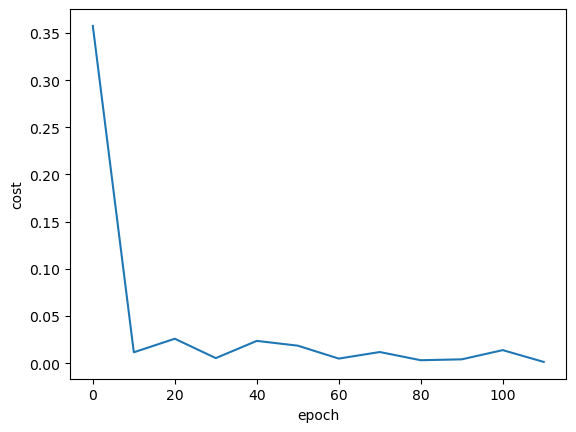

In [52]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)